In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
from xgboost import plot_importance
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1500)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv('/Users/garb47/2018HCIntern/datasets/unimelb_training.csv', low_memory= False)
test_df = pd.read_csv('/Users/garb47/2018HCIntern/datasets/unimelb_test.csv')
combine = [train_df, test_df]

In [4]:
train_df.head()


,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1,Person.ID.2,Role.2,Year.of.Birth.2,Country.of.Birth.2,Home.Language.2,Dept.No..2,Faculty.No..2,With.PHD.2,No..of.Years.in.Uni.at.Time.of.Grant.2,Number.of.Successful.Grant.2,Number.of.Unsuccessful.Grant.2,A..2,A.2,B.2,C.2,Person.ID.3,Role.3,Year.of.Birth.3,Country.of.Birth.3,Home.Language.3,Dept.No..3,Faculty.No..3,With.PHD.3,No..of.Years.in.Uni.at.Time.of.Grant.3,Number.of.Successful.Grant.3,Number.of.Unsuccessful.Grant.3,A..3,A.3,B.3,C.3,Person.ID.4,Role.4,Year.of.Birth.4,Country.of.Birth.4,Home.Language.4,Dept.No..4,Faculty.No..4,With.PHD.4,No..of.Years.in.Uni.at.Time.of.Grant.4,Number.of.Successful.Grant.4,Number.of.Unsuccessful.Grant.4,A..4,A.4,B.4,C.4,Person.ID.5,Role.5,Year.of.Birth.5,Country.of.Birth.5,Home.Language.5,Dept.No..5,Faculty.No..5,With.PHD.5,No..of.Years.in.Uni.at.Time.of.Grant.5,Number.of.Successful.Grant.5,Number.of.Unsuccessful.Grant.5,A..5,A.5,B.5,C.5,Person.ID.6,Role.6,Year.of.Birth.6,Country.of.Birth.6,Home.Language.6,Dept.No..6,Faculty.No..6,With.PHD.6,No..of.Years.in.Uni.at.Time.of.Grant.6,Number.of.Successful.Grant.6,Number.of.Unsuccessful.Grant.6,A..6,A.6,B.6,C.6,Person.ID.7,Role.7,Year.of.Birth.7,Country.of.Birth.7,Home.Language.7,Dept.No..7,Faculty.No..7,With.PHD.7,No..of.Years.in.Uni.at.Time.of.Grant.7,Number.of.Successful.Grant.7,Number.of.Unsuccessful.Grant.7,A..7,A.7,B.7,C.7,Person.ID.8,Role.8,Year.of.Birth.8,Country.of.Birth.8,Home.Language.8,Dept.No..8,Faculty.No..8,With.PHD.8,No..of.Years.in.Uni.at.Time.of.Grant.8,Number.of.Successful.Grant.8,Number.of.Unsuccessful.Grant.8,A..8,A.8,B.8,C.8,Person.ID.9,Role.9,Year.of.Birth.9,Country.of.Birth.9,Home.Language.9,Dept.No..9,Faculty.No..9,With.PHD.9,No..of.Years.in.Uni.at.Time.of.Grant.9,Number.of.Successful.Grant.9,Number.of.Unsuccessful.Grant.9,A..9,A.9,B.9,C.9,Person.ID.10,Role.10,Year.of.Birth.10,Country.of.Birth.10,Home.Language.10,Dept.No..10,Faculty.No..10,With.PHD.10,No..of.Years.in.Uni.at.Time.of.Grant.10,Number.of.Successful.Grant.10,Number.of.Unsuccessful.Grant.10,A..10,A.10,B.10,C.10,Person.ID.11,Role.11,Year.of.Birth.11,Country.of.Birth.11,Home.Language.11,Dept.No..11,Faculty.No..11,With.PHD.11,No..of.Years.in.Uni.at.Time.of.Grant.11,Number.of.Successful.Grant.11,Number.of.Unsuccessful.Grant.11,A..11,A.11,B.11,C.11,Person.ID.12,Role.12,Year.of.Birth.12,Country.of.Birth.12,Home.Language.12,Dept.No..12,Faculty.No..12,With.PHD.12,No..of.Years.in.Uni.at.Time.of.Grant.12,Number.of.Successful.Grant.12,Number.of.Unsuccessful.Grant.12,A..12,A.12,B.12,C.12,Person.ID.13,Role.13,Year.of.Birth.13,Country.of.Birth.13,Home.Language.13,Dept.No..13,Faculty.No..13,With.PHD.13,No..of.Years.in.Uni.at.Time.of.Grant.13,Number.of.Successful.Grant.13,Number.of.Unsuccessful.Grant.13,A..13,A.13,B.13,C.13,Person.ID.14,Role.14,Year.of.Birth.14,Country.of.Birth.14,Home.Language.14,Dept.No..14,Faculty.No..14,With.PHD.14,No..of.Years.in.Uni.at.Time.of.Grant.14,Number.of.Successful.Grant.14,Number.of.Unsuccessful.Grant.14,A..14,A.14,B.14,C.14,Person.ID.15,Role.15,Year.of.Birth.15,Country.of.Birth.15,Home.Language.15,Dept.No..15,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,1965.0,Asia Pacific,

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Columns: 252 entries, Grant.Application.ID to Unnamed: 251
dtypes: float64(180), int64(2), object(70)
memory usage: 16.7+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Columns: 252 entries, Grant.Application.ID to Unnamed: 251
dtypes: float64(186), int64(1), object(65)
memory usage: 4.2+ MB


In [6]:
train_df['With.PHD.1'].describe()

count     5113
unique       1
top       Yes 
freq      5113
Name: With.PHD.1, dtype: object

In [7]:
train_df.describe(include=['O'])

,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,Role.1,Country.of.Birth.1,Home.Language.1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Role.2,Country.of.Birth.2,Home.Language.2,With.PHD.2,No..of.Years.in.Uni.at.Time.of.Grant.2,Role.3,Country.of.Birth.3,Home.Language.3,With.PHD.3,No..of.Years.in.Uni.at.Time.of.Grant.3,Role.4,Country.of.Birth.4,Home.Language.4,With.PHD.4,No..of.Years.in.Uni.at.Time.of.Grant.4,Role.5,Country.of.Birth.5,Home.Language.5,With.PHD.5,No..of.Years.in.Uni.at.Time.of.Grant.5,Role.6,Country.of.Birth.6,Home.Language.6,With.PHD.6,No..of.Years.in.Uni.at.Time.of.Grant.6,Role.7,Country.of.Birth.7,Home.Language.7,With.PHD.7,No..of.Years.in.Uni.at.Time.of.Grant.7,Role.8,Country.of.Birth.8,Home.Language.8,With.PHD.8,No..of.Years.in.Uni.at.Time.of.Grant.8,Role.9,Country.of.Birth.9,Home.Language.9,With.PHD.9,No..of.Years.in.Uni.at.Time.of.Grant.9,Role.10,Country.of.Birth.10,Home.Language.10,With.PHD.10,No..of.Years.in.Uni.at.Time.of.Grant.10,Role.11,Country.of.Birth.11,With.PHD.11,No..of.Years.in.Uni.at.Time.of.Grant.11,Role.12,Country.of.Birth.12,With.PHD.12,No..of.Years.in.Uni.at.Time.of.Grant.12,Role.13,Country.of.Birth.13,With.PHD.13,No..of.Years.in.Uni.at.Time.of.Grant.13,Country.of.Birth.14,Role.15,Country.of.Birth.15,No..of.Years.in.Uni.at.Time.of.Grant.15
count,7796,7796,5145,8708,8610,7428,798,5113,7227,4402,2516,274,1748,2504,2191,953,97,653,939,1156,373,31,275,366,568,140,14,100,136,310,57,4,44,56,93,16,2,25,32,53,12,2,8,12,34,8,2,7,8,27,6,3,5,6,19,5,3,5,14,5,5,5,11,3,3,3,3,8,2,2
unique,297,13,16,712,7,10,2,1,5,8,10,2,1,5,8,10,2,1,5,7,10,2,1,5,6,9,2,1,5,6,6,1,1,5,4,4,1,1,5,4,7,2,1,5,3,4,2,1,4,4,3,2,1,4,3,1,1,3,2,2,1,3,3,1,1,1,1,2,1,1
top,4D,10A,A,19/11/05,CHIEF_INVESTIGATOR,Australia,English,Yes,>=0 to 5,CHIEF_INVESTIGATOR,Australia,English,Yes,>=0 to 5,CHIEF_INVESTIGATOR,Australia,English,Yes,>=0 to 5,EXT_CHIEF_INVESTIGATOR,Australia,English,Yes,more than 15,EXT_CHIEF_INVESTIGATOR,Australia,English,Yes,>5 to 10,EXT_CHIEF_INVESTIGATOR,Australia,English,Yes,>=0 to 5,EXT_CHIEF_INVESTIGATOR,Australia,English,Yes,>=0 to 5,EXT_CHIEF_INVESTIGATOR,Australia,Other,Yes,>=0 to 5,EXT_CHIEF_INVESTIGATOR,Australia,Other,Yes,>=0 to 5,EXT_CHIEF_INVESTIGATOR,Australia,Other,Yes,more than 15,EXT_CHIEF_INVESTIGATOR,Australia,Yes,more than 15,EXT_CHIEF_INVESTIGATOR,Australia,Yes,>10 to 15,EXT_CHIEF_INVESTIGATOR,Australia,Yes,>10 to 15,North America,EXT_CHIEF_INVESTIGATOR,Australia,more than 15
freq,2006,3953,2476,1079,7741,5445,629,5113,2830,2705,1860,223,1748,881,1050,714,78,653,312,659,297,29,275,106,386,102,12,100,36,231,45,4,44,18,74,12,2,25,16,39,3,1,8,4,25,5,1,7,4,20,3,2,5,2,14,5,3,2,9,4,5,2,8,3,3,3,3,6,2,2


In [8]:
train_df[['Grant.Category.Code','Grant.Status']].groupby(['Grant.Category.Code'], as_index=False).mean().sort_values(by='Grant.Status',ascending=False)

,Grant.Category.Code,Grant.Status
4,30A,1.000000
11,40C,1.000000
12,50A,0.640342
6,30C,0.581006
2,20A,0.531250
3,20C,0.503686
8,30E,0.454545
1,10B,0.438479
0,10A,0.373134
5,30B,0.315991


In [9]:
train_df[['Role.2','Grant.Status']].groupby(['Role.2'], as_index=False).mean().sort_values(by='Grant.Status',ascending=False)

,Role.2,Grant.Status
2,EXTERNAL_ADVISOR,1.000000
6,STUDRES,0.857143
4,HONVISIT,0.714286
7,STUD_CHIEF_INVESTIGATOR,0.530667
1,DELEGATED_RESEARCHER,0.514286
5,PRINCIPAL_SUPERVISOR,0.453846
0,CHIEF_INVESTIGATOR,0.440296
3,EXT_CHIEF_INVESTIGATOR,0.435282


In [10]:
newdf = train_df[train_df.columns[0:41]]
test_df=test_df[test_df.columns[0:41]]

In [11]:
newdf.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,1965.0,Asia Pacific,Other,3073.0,31.0,NaN,Less than 0,0.0,0.0,4.0,2.0,0.0,0.0
1,2,1,2B,10A,B,11/11/05,280103.0,30.0,280106.0,30.0,280203.0,40.0,0.0,0.0,0.0,0.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,9067.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2538.0,25.0,Yes,more than 15,0.0,0.0,6.0,12.0,2.0,2.0
2,3,1,29A,10B,A,14/11/05,321004.0,60.0,321216.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5967.0,CHIEF_INVESTIGATOR,1955.0,Australia,NaN,2923.0,25.0,Yes,>5 to 10,0.0,0.0,0.0,3.0,5.0,2.0
3,4,1,40D,10B,C,15/11/05,270602.0,50.0,320602.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,78782.0,PRINCIPAL_SUPERVISOR,1955.0,Australia,NaN,2678.0,25.0,Yes,>5 to 10,0.0,0.0,0.0,3.0,13.0,3.0
4,5,0,59C,10A,A,16/11/05,260500.0,34.0,280000.0,33.0,290000.0,33.0,0.0,0.0,0.0,0.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13042.0,CHIEF_INVESTIGATOR,1965.0,Western Europe,NaN,2153.0,19.0,Yes,>5 to 10,0.0,0.0,3.0,0.0,1.0,0.0


In [12]:
newdf = newdf[np.isfinite(newdf['RFCD.Code.1'])]

In [13]:
newdf.describe()

,Grant.Application.ID,Grant.Status,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Year.of.Birth.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
count,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8037.000000,8037.000000,8037.000000,8037.000000,8037.000000,8037.000000,8037.000000,8037.000000,8037.000000,8037.000000,7.608000e+03,7605.000000,7284.000000,7281.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,4457.369210,0.455165,314625.121006,75.005251,158842.523161,17.595281,92956.217736,6.883986,6551.696309,0.406490,1750.273223,0.108992,729835.882668,71.806644,427796.084982,20.427884,219702.871718,6.837887,31186.095807,0.727137,9521.026502,0.200324,1.677117e+05,1962.485207,2447.013591,23.864854,1.224106,2.161015,4.044295,5.540221,4.358833,2.292850
std,2509.999385,0.498017,51817.235580,26.836228,160685.895040,19.438356,146607.359501,11.806640,44953.214321,3.004969,23666.752850,1.613000,36538.256601,26.805790,359979.817073,20.130727,334893.411328,11.747978,147386.467037,3.851018,82827.182074,2.010348,2.501062e+05,9.480382,739.532988,11.618873,1.553011,2.946652,7.815592,7.945818,5.960282,4.377475
min,1.000000,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,610101.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.570000e+02,1930.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2344.000000,0.000000,280204.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730104.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.850200e+04,1955.000000,2298.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4523.500000,0.000000,320704.000000,80.000000,230202.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730111.000000,70.000000,700302.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.186700e+04,1965.000000,2628.000000,25.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,6632.500000,1.000000,321202.000000,100.000000,320700.750000,30.000000,270105.000000,10.000000,0.000000,0.000000,0.000000,0.000000,749906.000000,100.000000,730211.000000,40.000000,700299.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.154070e+05,1970.000000,2813.000000,25.000000,2.000000,3.000000,5.000000,7.000000,6.000000,3.000000
max,8708.000000,1.000000,999999.000000,100.000000,440209.000000,90.000000,440207.000000,80.000000,440202.000000,70.000000,419999.000000,40.000000,999999.000000,100.000000,780199.000000,90.000000,780199.000000,80.000000,780108.000000,50.000000,780108.000000,50.000000,1.162272e+06,1985.000000,4418.000000,187.000000,13.000000,26.000000,123.000000,95.000000,69.000000,61.000000


In [14]:
newdf = newdf[np.isfinite(newdf['Year.of.Birth.1'])]
newdf.describe()

,Grant.Application.ID,Grant.Status,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Year.of.Birth.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
count,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.00000,7605.000000,7605.000000,7605.000000,7605.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7.605000e+03,7605.000000,7281.000000,7278.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000
mean,4438.849441,0.463248,314640.164366,74.565207,161577.159106,17.898133,94648.279290,6.99925,6837.237738,0.421696,1858.212492,0.115713,729669.964460,71.785837,427913.248117,20.467816,218746.610120,6.805007,31683.093804,0.731140,9807.117981,0.210067,1.675373e+05,1962.485207,2446.314105,23.860676,1.224326,2.161604,4.044576,5.542406,4.360552,2.293754
std,2499.630405,0.498680,52369.451490,26.881180,160609.703931,19.482775,147345.946861,11.83898,45914.523596,3.055781,24381.579330,1.661765,37086.823682,26.801047,359937.704877,20.125660,334474.240256,11.721896,148527.214963,3.834579,83984.383014,2.066418,2.499130e+05,9.480382,738.848751,11.618168,1.553250,2.947069,7.816981,7.946623,5.960829,4.378102
min,1.000000,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,610101.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.570000e+02,1930.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2311.000000,0.000000,280204.000000,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,730104.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.850200e+04,1955.000000,2298.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4477.000000,0.000000,320703.000000,80.000000,240203.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,730111.000000,70.000000,700302.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.186700e+04,1965.000000,2628.000000,25.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,6637.000000,1.000000,321202.000000,100.000000,320702.000000,30.000000,270199.000000,15.00000,0.000000,0.000000,0.000000,0.000000,749999.000000,100.000000,730211.000000,40.000000,700199.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.152520e+05,1970.000000,2813.000000,25.000000,2.000000,3.000000,5.000000,7.000000,6.000000,3.000000
max,8708.000000,1.000000,999999.000000,100.000000,440209.000000,90.000000,440207.000000,80.00000,440202.000000,70.000000,419999.000000,40.000000,999999.000000,100.000000,780199.000000,90.000000,780199.000000,80.000000,780108.000000,40.000000,780108.000000,50.000000,1.162272e+06,1985.000000,4418.000000,187.000000,13.000000,26.000000,123.000000,95.000000,69.000000,61.000000


In [15]:
newdf.describe(include=['O'])

,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,Role.1,Country.of.Birth.1,Home.Language.1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1
count,6970,6970,4603,7605,7605,6904,760,4786,6729
unique,280,13,16,683,4,10,2,1,5
top,4D,10A,A,19/11/05,CHIEF_INVESTIGATOR,Australia,English,Yes,>=0 to 5
freq,1706,3547,2252,890,7183,5053,596,4786,2642


In [16]:
train_df[['Home.Language.1','Grant.Status']].groupby(['Home.Language.1'], as_index=False).mean().sort_values(by='Grant.Status',ascending=False)

,Home.Language.1,Grant.Status
1,Other,0.479290
0,English,0.443561


In [17]:
train_df[['Country.of.Birth.1','Grant.Status']].groupby(['Country.of.Birth.1'], as_index=False).mean().sort_values(by='Grant.Status',ascending=False)

,Country.of.Birth.1,Grant.Status
7,South Africa,0.520833
6,North America,0.479245
1,Australia,0.472911
8,The Americas,0.472222
3,Great Britain,0.470499
0,Asia Pacific,0.460606
5,New Zealand,0.455696
9,Western Europe,0.451807
2,Eastern Europe,0.428571
4,Middle East and Africa,0.376623


In [18]:
check=train_df[['Country.of.Birth.1','Home.Language.1']].dropna().drop_duplicates().sort_values(by='Country.of.Birth.1',ascending=False)
check

,Country.of.Birth.1,Home.Language.1
100,Western Europe,Other
468,Western Europe,English
151,The Americas,Other
328,The Americas,English
5464,South Africa,English
521,North America,English
5052,North America,Other
1342,Middle East and Africa,Other
1535,Middle East and Africa,English
209,Great Britain,English


In [19]:
newdf = newdf.drop(['Grant.Application.ID'],axis = 1)
test_df=test_df.drop(['Grant.Application.ID'],axis = 1)

In [20]:
train_df=newdf
combine=[train_df, test_df]

In [21]:
mapping = {'Yes ' :1}
for dataset in combine:
    dataset['With.PHD.1'] = dataset['With.PHD.1'].map(mapping)
    dataset['With.PHD.1'] = dataset['With.PHD.1'].fillna(0)
train_df['With.PHD.1'].head()


0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: With.PHD.1, dtype: float64

In [22]:
country_mapping = {'Western Europe' :1, 'Eastern Europe':2, 'The Americas':3 ,'North America':4, 'South Africa':5, 'Great Britain': 6, 'Australia': 7, 'New Zealand': 8, 'Asia Pacific': 9,'Middle East and Africa':10}
for dataset in combine:
    dataset['Country.of.Birth.1'] = dataset['Country.of.Birth.1'].map(country_mapping)
    dataset['Country.of.Birth.1'] = dataset['Country.of.Birth.1'].fillna(0)
train_df.describe(include=['O'])    
    

,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,Role.1,Home.Language.1,No..of.Years.in.Uni.at.Time.of.Grant.1
count,6970,6970,4603,7605,7605,760,6729
unique,280,13,16,683,4,2,5
top,4D,10A,A,19/11/05,CHIEF_INVESTIGATOR,English,>=0 to 5
freq,1706,3547,2252,890,7183,596,2642


In [23]:
train_df=train_df.drop(['Home.Language.1'], axis=1)
test_df=test_df.drop(['Home.Language.1'], axis=1)

combine=[train_df, test_df]

In [24]:
train_df.describe()

,Grant.Status,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Year.of.Birth.1,Country.of.Birth.1,Dept.No..1,Faculty.No..1,With.PHD.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
count,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.00000,7605.000000,7605.000000,7605.000000,7605.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7.605000e+03,7605.000000,7605.000000,7281.000000,7278.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000
mean,0.463248,314640.164366,74.565207,161577.159106,17.898133,94648.279290,6.99925,6837.237738,0.421696,1858.212492,0.115713,729669.964460,71.785837,427913.248117,20.467816,218746.610120,6.805007,31683.093804,0.731140,9807.117981,0.210067,1.675373e+05,1962.485207,5.426036,2446.314105,23.860676,0.629323,1.224326,2.161604,4.044576,5.542406,4.360552,2.293754
std,0.498680,52369.451490,26.881180,160609.703931,19.482775,147345.946861,11.83898,45914.523596,3.055781,24381.579330,1.661765,37086.823682,26.801047,359937.704877,20.125660,334474.240256,11.721896,148527.214963,3.834579,83984.383014,2.066418,2.499130e+05,9.480382,2.957521,738.848751,11.618168,0.483018,1.553250,2.947069,7.816981,7.946623,5.960829,4.378102
min,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,610101.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.570000e+02,1930.000000,0.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,280204.000000,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,730104.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.850200e+04,1955.000000,4.000000,2298.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,320703.000000,80.000000,240203.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,730111.000000,70.000000,700302.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.186700e+04,1965.000000,7.000000,2628.000000,25.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,1.000000,321202.000000,100.000000,320702.000000,30.000000,270199.000000,15.00000,0.000000,0.000000,0.000000,0.000000,749999.000000,100.000000,730211.000000,40.000000,700199.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.152520e+05,1970.000000,7.000000,2813.000000,25.000000,1.000000,2.000000,3.000000,5.000000,7.000000,6.000000,3.000000
max,1.000000,999999.000000,100.000000,440209.000000,90.000000,440207.000000,80.00000,440202.000000,70.000000,419999.000000,40.000000,999999.000000,100.000000,780199.000000,90.000000,780199.000000,80.000000,780108.000000,40.000000,780108.000000,50.000000,1.162272e+06,1985.000000,10.000000,4418.000000,187.000000,1.000000,13.000000,26.000000,123.000000,95.000000,69.000000,61.000000


In [25]:
train_df.describe(include=['O'])    
    
    

,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,Role.1,No..of.Years.in.Uni.at.Time.of.Grant.1
count,6970,6970,4603,7605,7605,6729
unique,280,13,16,683,4,5
top,4D,10A,A,19/11/05,CHIEF_INVESTIGATOR,>=0 to 5
freq,1706,3547,2252,890,7183,2642


In [26]:
train_df['Role.1'].unique()

array(['CHIEF_INVESTIGATOR', 'PRINCIPAL_SUPERVISOR',
       'DELEGATED_RESEARCHER', 'HONVISIT'], dtype=object)

In [27]:
role_mapping = {'CHIEF_INVESTIGATOR' :1, 'PRINCIPAL_SUPERVISOR' :2,
       'DELEGATED_RESEARCHER':3, 'HONVISIT':4}
for dataset in combine:
    dataset['Role.1'] = dataset['Role.1'].map(role_mapping)
train_df.describe(include=['O'])    



,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,No..of.Years.in.Uni.at.Time.of.Grant.1
count,6970,6970,4603,7605,6729
unique,280,13,16,683,5
top,4D,10A,A,19/11/05,>=0 to 5
freq,1706,3547,2252,890,2642


In [28]:
train_df['No..of.Years.in.Uni.at.Time.of.Grant.1'].unique()

array(['Less than 0', 'more than 15', '>5 to 10', '>=0 to 5', '>10 to 15',
       nan], dtype=object)

In [29]:
year_mapping = {'Less than 0':1, 'more than 15':2, '>5 to 10':3, '>=0 to 5':4, '>10 to 15':5}
for dataset in combine:
    dataset['No..of.Years.in.Uni.at.Time.of.Grant.1'] = dataset['No..of.Years.in.Uni.at.Time.of.Grant.1'].map(year_mapping)
    dataset['No..of.Years.in.Uni.at.Time.of.Grant.1'] = dataset['No..of.Years.in.Uni.at.Time.of.Grant.1'].fillna(0)
train_df['No..of.Years.in.Uni.at.Time.of.Grant.1'].head()

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
Name: No..of.Years.in.Uni.at.Time.of.Grant.1, dtype: float64

In [30]:
train_df.describe(include=['O'])    

,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date
count,6970,6970,4603,7605
unique,280,13,16,683
top,4D,10A,A,19/11/05
freq,1706,3547,2252,890


In [31]:
train_df['Grant.Category.Code'].unique()

array([nan, '10A', '10B', '30B', '50A', '30D', '30G', '20C', '30C', '20A',
       '30E', '30A', '40C', '30F'], dtype=object)

In [32]:
train_df['Contract.Value.Band...see.note.A'].unique()

array(['A ', 'B ', 'C ', nan, 'H ', 'G ', 'F ', 'D ', 'E ', 'K ', 'I ',
       'Q ', 'J ', 'L ', 'M ', 'O ', 'P '], dtype=object)

In [33]:
cont_mapping = {'A ':1, 'B ':2, 'C ':3, 'H ':4, 'G ':5, 'F ':6, 'D ':7, 'E ':8, 'K ':9, 'I ':10,
       'Q ':11, 'J ':12, 'L ':13, 'M ':14, 'O ':15, 'P ':16}
for dataset in combine:
    dataset['Contract.Value.Band...see.note.A'] = dataset['Contract.Value.Band...see.note.A'].map(cont_mapping)
    dataset['Contract.Value.Band...see.note.A'] = dataset['Contract.Value.Band...see.note.A'].fillna(0)
train_df['Contract.Value.Band...see.note.A'].head()

0    1.0
1    2.0
2    1.0
3    3.0
4    1.0
Name: Contract.Value.Band...see.note.A, dtype: float64

In [34]:
train_df.describe(include=['O'])    

,Sponsor.Code,Grant.Category.Code,Start.date
count,6970,6970,7605
unique,280,13,683
top,4D,10A,19/11/05
freq,1706,3547,890


In [35]:
train_df[['Sponsor.Code','Grant.Status']].groupby(['Sponsor.Code'], as_index=False).mean().sort_values(by='Grant.Status',ascending=False)

,Sponsor.Code,Grant.Status
156,278B,1.000000
132,253A,1.000000
180,303C,1.000000
170,292D,1.000000
166,288D,1.000000
165,287C,1.000000
159,280D,1.000000
82,201A,1.000000
153,275C,1.000000
152,274B,1.000000


In [36]:
train_df[['Grant.Category.Code','Grant.Status']].groupby(['Grant.Category.Code'], as_index=False).mean().sort_values(by='Grant.Status',ascending=False)

,Grant.Category.Code,Grant.Status
4,30A,1.000000
11,40C,1.000000
12,50A,0.679070
6,30C,0.605505
8,30E,0.555556
2,20A,0.542056
3,20C,0.536023
1,10B,0.456522
0,10A,0.378630
5,30B,0.336797


In [37]:
cat_mapping = {'10A':1, '10B':2, '30B':3, '50A':4, '30D':5, '30G':6, '20C':7, '30C':8, '20A':9,
       '30E':10, '30A':11, '40C':12, '30F':13}
for dataset in combine:
    dataset['Grant.Category.Code'] = dataset['Grant.Category.Code'].map(cat_mapping)
    dataset['Grant.Category.Code'] = dataset['Grant.Category.Code'].fillna(0)
train_df['Grant.Category.Code'].head()

0    0.0
1    1.0
2    2.0
3    2.0
4    1.0
Name: Grant.Category.Code, dtype: float64

In [38]:
train_df.describe(include=['O'])

,Sponsor.Code,Start.date
count,6970,7605
unique,280,683
top,4D,19/11/05
freq,1706,890


In [39]:
train_df[['Start.date','Grant.Status']].groupby(['Start.date'], as_index=False).mean().sort_values(by='Grant.Status',ascending=False)

,Start.date,Grant.Status
0,1/01/06,1.000000
239,19/03/08,1.000000
577,5/04/06,1.000000
578,5/04/07,1.000000
247,19/07/06,1.000000
246,19/06/08,1.000000
244,19/06/06,1.000000
242,19/05/06,1.000000
241,19/04/07,1.000000
581,5/06/06,1.000000


In [40]:
check= train_df['Sponsor.Code'].fillna(0)
check.describe()

count     7605
unique     281
top         4D
freq      1706
Name: Sponsor.Code, dtype: object

In [41]:
check=check.str.extract('(\d+)').astype(float)
check.describe()

count    6970.000000
mean       40.676184
std        68.358494
min         1.000000
25%         4.000000
50%         6.000000
75%        40.000000
max       437.000000
Name: Sponsor.Code, dtype: float64

In [42]:
check.fillna(value=0,inplace=True)
check.describe()

count    7605.000000
mean       37.279816
std        66.402484
min         0.000000
25%         2.000000
50%         4.000000
75%        34.000000
max       437.000000
Name: Sponsor.Code, dtype: float64

In [43]:
len(check.unique())

281

In [44]:
train_df['Sponsor.Code']=check
train_df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,0.0,0.0,1.0,8/11/05,280199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40572.0,1,1965.0,9.0,3073.0,31.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0
1,1,2.0,1.0,2.0,11/11/05,280103.0,30.0,280106.0,30.0,280203.0,40.0,0.0,0.0,0.0,0.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,9067.0,1,1960.0,7.0,2538.0,25.0,1.0,2.0,0.0,0.0,6.0,12.0,2.0,2.0
2,1,29.0,2.0,1.0,14/11/05,321004.0,60.0,321216.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5967.0,1,1955.0,7.0,2923.0,25.0,1.0,3.0,0.0,0.0,0.0,3.0,5.0,2.0
3,1,40.0,2.0,3.0,15/11/05,270602.0,50.0,320602.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,78782.0,2,1955.0,7.0,2678.0,25.0,1.0,3.0,0.0,0.0,0.0,3.0,13.0,3.0
4,0,59.0,1.0,1.0,16/11/05,260500.0,34.0,280000.0,33.0,290000.0,33.0,0.0,0.0,0.0,0.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13042.0,1,1965.0,1.0,2153.0,19.0,1.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0


In [45]:
check=test_df['Sponsor.Code']

In [46]:
check=check.str.extract('(\d+)').astype(float)
check.describe()

count    2125.000000
mean       44.172706
std        91.077587
min         1.000000
25%         2.000000
50%         4.000000
75%        32.000000
max       441.000000
Name: Sponsor.Code, dtype: float64

In [47]:
check.fillna(value=0,inplace=True)
check.describe()

count    2176.000000
mean       43.137408
std        90.251322
min         0.000000
25%         2.000000
50%         4.000000
75%        29.000000
max       441.000000
Name: Sponsor.Code, dtype: float64

In [48]:
test_df['Sponsor.Code']=check

In [49]:
combine=[train_df,test_df]

In [50]:
train_df.describe(include=['O'])

,Start.date
count,7605
unique,683
top,19/11/05
freq,890


In [51]:
check=pd.to_datetime(train_df['Start.date'])
check.head()

0   2005-08-11
1   2005-11-11
2   2005-11-14
3   2005-11-15
4   2005-11-16
Name: Start.date, dtype: datetime64[ns]

In [52]:
train_df['Start.date']=check

In [53]:
test_df['Start.date']=pd.to_datetime(test_df['Start.date'])
test_df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,NaN,47.0,2.0,1.0,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24017.0,2.0,1970.0,7.0,2603.0,25.0,1.0,3.0,4.0,2.0,8.0,4.0,10.0,0.0
1,NaN,32.0,3.0,7.0,2009-01-01,270199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,780105.0,50.0,730108.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,67467.0,1.0,1955.0,7.0,2828.0,25.0,0.0,3.0,5.0,3.0,4.0,5.0,5.0,0.0
2,NaN,99.0,3.0,10.0,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992.0,1.0,1960.0,7.0,2853.0,25.0,1.0,5.0,0.0,2.0,9.0,34.0,22.0,20.0
3,NaN,2.0,1.0,8.0,2009-01-01,280204.0,60.0,280506.0,20.0,230119.0,20.0,0.0,0.0,0.0,0.0,610104.0,50.0,710603.0,30.0,671206.0,20.0,0.0,0.0,0.0,0.0,39562.0,1.0,1945.0,0.0,2153.0,19.0,1.0,3.0,4.0,0.0,5.0,3.0,6.0,2.0
4,NaN,24.0,3.0,2.0,2009-01-01,320502.0,50.0,320703.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730104.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,659757.0,1.0,1960.0,7.0,2668.0,25.0,1.0,4.0,2.0,7.0,11.0,3.0,2.0,0.0


In [54]:
combine=[train_df,test_df]

In [55]:
check=train_df.drop(['Start.date'], axis=1)

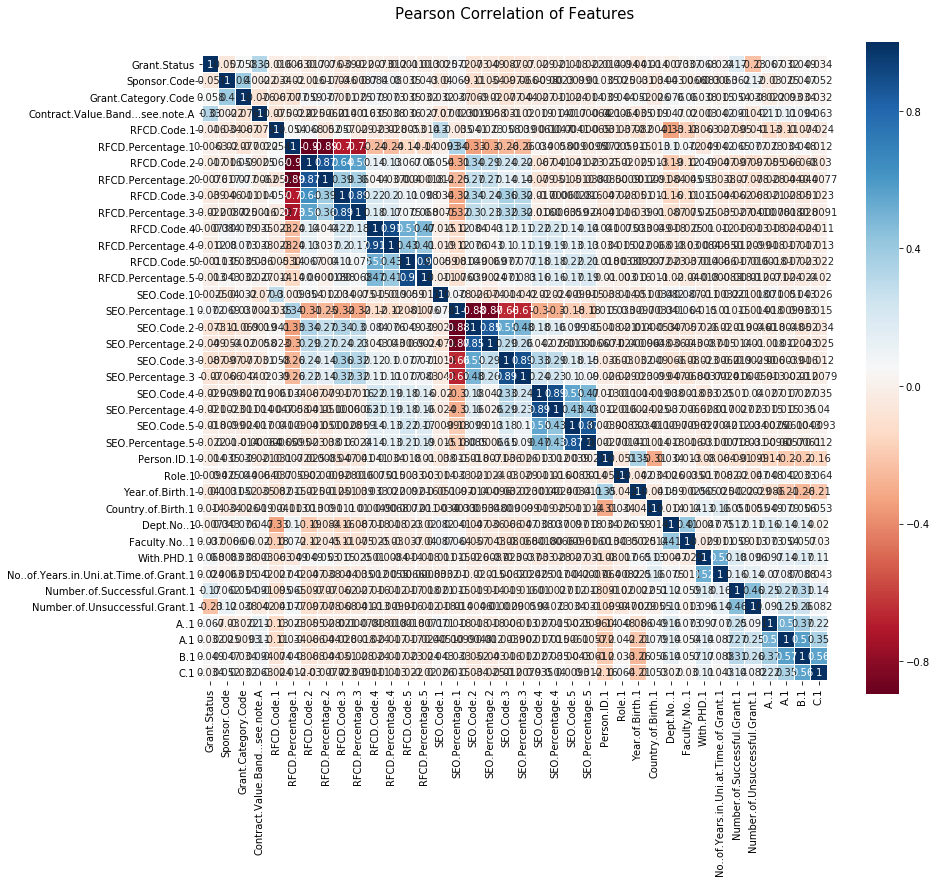

In [56]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(check.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [57]:
check= check[np.isfinite(check['Dept.No..1'])]

In [58]:
check=check.dropna()

In [59]:
check.describe()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
count,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7.243000e+03,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000
mean,0.461273,37.035759,2.435593,1.783239,314458.012702,74.702250,161142.789314,17.858249,93703.271711,6.906296,6836.141240,0.419992,1810.106310,0.113213,729612.117493,72.018777,425604.988955,20.315601,217466.246583,6.748184,31428.375121,0.712274,9647.557090,0.205026,1.622779e+05,1.068480,1962.525887,5.624465,2447.041143,23.752865,0.653597,3.007594,1.272953,2.249344,4.137512,5.683833,4.438630,2.334944
std,0.498532,65.905933,2.246809,2.461627,51573.773907,26.805598,160451.041441,19.494936,146750.691945,11.766350,45895.466644,3.047411,23967.899472,1.653796,36766.795225,26.780715,360209.018355,20.109886,333847.732131,11.675674,148016.566121,3.747896,83318.023818,2.046158,2.446440e+05,0.308231,9.418790,2.817288,733.626488,11.262292,0.475856,1.464322,1.569585,2.980506,7.893441,8.051083,5.991703,4.399000
min,0.000000,0.000000,0.000000,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,610101.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.570000e+02,1.000000,1930.000000,0.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,280204.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730104.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.845700e+04,1.000000,1955.000000,7.000000,2298.000000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,4.000000,1.000000,1.000000,320702.000000,80.000000,240202.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730111.000000,70.000000,700199.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.144200e+04,1.000000,1965.000000,7.000000,2628.000000,25.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,1.000000,34.000000,3.000000,2.000000,321202.000000,100.000000,320702.000000,30.000000,270107.000000,10.000000,0.000000,0.000000,0.000000,0.000000,749906.000000,100.000000,730211.000000,40.000000,700101.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.111920e+05,1.000000,1970.000000,7.000000,2813.000000,25.000000,1.000000,4.000000,2.000000,3.000000,5.000000,7.000000,6.000000,3.000000
max,1.000000,437.000000,13.000000,16.000000,999999.000000,100.000000,440209.000000,90.000000,440207.000000,80.000000,440202.000000,70.000000,419999.000000,40.000000,999999.000000,100.000000,780199.000000,90.000000,780199.000000,80.000000,780108.000000,40.000000,780108.000000,50.000000,1.162272e+06,4.000000,1985.000000,10.000000,4418.000000,187.000000,1.000000,5.000000,13.000000,26.000000,123.000000,95.000000,69.000000,61.000000


In [60]:
check.to_csv('example.csv')

In [61]:
check['RFCD.Percentage.1']=check['RFCD.Percentage.1']/100
check['RFCD.Percentage.1'].head()

0    1.00
1    0.30
2    0.60
3    0.50
4    0.34
Name: RFCD.Percentage.1, dtype: float64

In [62]:
check['RFCD.Percentage.2']=check['RFCD.Percentage.2']/100
check['RFCD.Percentage.3']=check['RFCD.Percentage.3']/100
check['RFCD.Percentage.4']=check['RFCD.Percentage.4']/100
check['RFCD.Percentage.5']=check['RFCD.Percentage.5']/100

In [109]:
check['SEO.Percentage.1']=check['SEO.Percentage.1']/100
check['SEO.Percentage.2']=check['SEO.Percentage.2']/100
check['SEO.Percentage.3']=check['SEO.Percentage.3']/100
check['SEO.Percentage.4']=check['SEO.Percentage.4']/100
check['SEO.Percentage.5']=check['SEO.Percentage.5']/100

In [110]:
check['Sponsor.Code'] =check['Sponsor.Code']/ np.sum(check['Sponsor.Code'])
check['RFCD.Code.1'] =check['RFCD.Code.1']/ np.sum(check['RFCD.Code.1'])
check['RFCD.Code.2'] = check['RFCD.Code.2']/np.sum(check['RFCD.Code.2'])
check['RFCD.Code.3'] = check['RFCD.Code.3']/np.sum(check['RFCD.Code.3'])
check['RFCD.Code.4'] = check['RFCD.Code.4']/np.sum(check['RFCD.Code.4'])
check['RFCD.Code.5'] = check['RFCD.Code.5']/np.sum(check['RFCD.Code.5'])
check['SEO.Code.1'] = check['SEO.Code.1']/np.sum(check['SEO.Code.1'])
check['SEO.Code.2'] = check['SEO.Code.2']/np.sum(check['SEO.Code.2'])
check['SEO.Code.3'] = check['SEO.Code.3']/np.sum(check['SEO.Code.3'])
check['SEO.Code.4'] = check['SEO.Code.4']/np.sum(check['SEO.Code.4'])
check['SEO.Code.5'] = check['SEO.Code.5']/np.sum(check['SEO.Code.5'])
check['Year.of.Birth.1'] = check['Year.of.Birth.1']/np.sum(check['Year.of.Birth.1'])
check['Dept.No..1'] = check['Dept.No..1']/np.sum(check['Dept.No..1'])


In [143]:
check=check.drop('Person.ID.1',axis=1)

In [4]:
train, test = train_test_split(check, train_size = 0.75)

NameError: name 'check' is not defined

In [145]:
X_train = train.drop('Grant.Status', axis=1)
Y_train = train['Grant.Status']
X_test = test.drop('Grant.Status',axis=1)
Y_test = test['Grant.Status']

In [146]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test)* 100, 2)
acc_log

61.51

In [147]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test)*100,2)
acc_svc

62.12

In [148]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn
accuracy_score(Y_test, Y_pred)

0.5814467145223633

In [149]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian
accuracy_score(Y_test, Y_pred)

0.5472114853672004

In [150]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron
accuracy_score(Y_test, Y_pred)

0.5339591385974599

In [151]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc
accuracy_score(Y_test, Y_pred)

0.4561016013252347

In [152]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd
accuracy_score(Y_test, Y_pred)

0.5317504141358366

In [153]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree
accuracy_score(Y_test, Y_pred)

0.8244064053009387

In [154]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest
accuracy_score(Y_test, Y_pred)

0.8702374378796245

In [123]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.97
8,Decision Tree,82.16
0,Support Vector Machines,77.80
2,Logistic Regression,74.65
1,KNN,73.55
7,Linear SVC,68.42
4,Naive Bayes,67.53
5,Perceptron,60.13
6,Stochastic Gradient Decent,59.08


In [155]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
Y_pred = gbrt.predict(X_test)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_test, Y_test) *100,2)
acc_gbrt

86.36

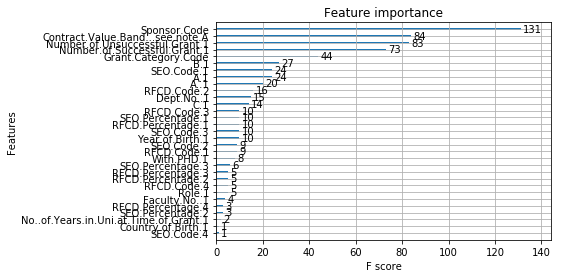

In [156]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
plot_importance(xgb)
pyplot.show()

In [158]:
check.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Role.1,Year.of.Birth.1,Country.of.Birth.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,0.0,0.0,1.0,280199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1965.0,9.0,3073.0,31.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0
1,1,2.0,1.0,2.0,280103.0,30.0,280106.0,30.0,280203.0,40.0,0.0,0.0,0.0,0.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1960.0,7.0,2538.0,25.0,1.0,2.0,0.0,0.0,6.0,12.0,2.0,2.0
2,1,29.0,2.0,1.0,321004.0,60.0,321216.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1955.0,7.0,2923.0,25.0,1.0,3.0,0.0,0.0,0.0,3.0,5.0,2.0
3,1,40.0,2.0,3.0,270602.0,50.0,320602.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1955.0,7.0,2678.0,25.0,1.0,3.0,0.0,0.0,0.0,3.0,13.0,3.0
4,0,59.0,1.0,1.0,260500.0,34.0,280000.0,33.0,290000.0,33.0,0.0,0.0,0.0,0.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1965.0,1.0,2153.0,19.0,1.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0


In [159]:
check2=check.drop('SEO.Code.4','Country.of.Birth.1','No..of.Years.in.Uni.at.Time.of.Grant.1','SEO.Percentage.2','SEO.Percentage.3','SEO.Percentage.4','SEO.Percentage.5','SEO.Code.2','SEO.Code.3','SEO.Code.5','RFCD.Percentage.1','RFCD.Percentage.2','RFCD.Percentage.3','RFCD.Percentage.4','RFCD.Percentage.5',axis=1)

TypeError: 'method' object is not subscriptable

In [138]:
Y_pred=xgb.predict(X_test)
xgb.score(X_train,Y_train)
acc_xgb=round(xgb.score(X_test,Y_test)*100,2)
acc_xgb

85.53

In [157]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','Gradient Boosting Classifier','XGBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_gbrt, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.02
9,Gradient Boosting Classifier,86.36
10,XGBoost,85.53
8,Decision Tree,82.44
0,Support Vector Machines,62.12
2,Logistic Regression,61.51
1,KNN,58.14
4,Naive Bayes,54.72
5,Perceptron,53.40
6,Stochastic Gradient Decent,53.18


In [182]:
check2=check.drop(['C.1','Faculty.No..1','With.PHD.1','Role.1','RFCD.Code.1','RFCD.Code.2','RFCD.Code.3','RFCD.Code.4','RFCD.Code.5','Year.of.Birth.1','SEO.Code.4','Country.of.Birth.1','No..of.Years.in.Uni.at.Time.of.Grant.1','SEO.Percentage.1','SEO.Percentage.2','SEO.Percentage.3','SEO.Percentage.4','SEO.Percentage.5','SEO.Code.2','SEO.Code.3','SEO.Code.5','RFCD.Percentage.1','RFCD.Percentage.2','RFCD.Percentage.3','RFCD.Percentage.4','RFCD.Percentage.5'],axis=1)

In [65]:
check2.dsecribe()

NameError: name 'check2' is not defined

In [184]:
train2, test2 = train_test_split(check2, train_size = 0.75)

In [3]:
X_train = train2.drop('Grant.Status', axis=1)
Y_train = train2['Grant.Status']
X_test = test2.drop('Grant.Status',axis=1)
Y_test = test2['Grant.Status']

NameError: name 'train2' is not defined

In [186]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test)* 100, 2)
acc_log

53.45

In [187]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test)*100,2)
acc_svc

67.64

In [188]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn
accuracy_score(Y_test, Y_pred)

0.6598564329099945

In [189]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian
accuracy_score(Y_test, Y_pred)

0.6604086140254003

In [190]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron
accuracy_score(Y_test, Y_pred)

0.4654886802871342

In [191]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc
accuracy_score(Y_test, Y_pred)

0.5345113197128658

In [192]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd
accuracy_score(Y_test, Y_pred)

0.4654886802871342

In [193]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree
accuracy_score(Y_test, Y_pred)

0.8172280508006626

In [194]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest
accuracy_score(Y_test, Y_pred)

0.8685808945334069

In [195]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
Y_pred = gbrt.predict(X_test)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_test, Y_test) *100,2)
acc_gbrt

85.15

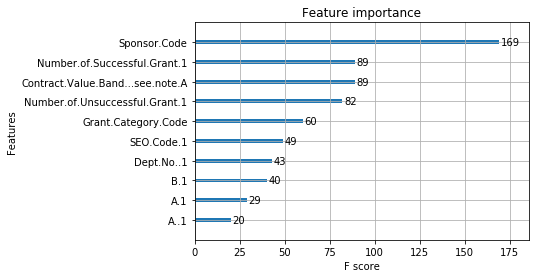

In [196]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
plot_importance(xgb)
pyplot.show()

In [197]:
Y_pred=xgb.predict(X_test)
xgb.score(X_train,Y_train)
acc_xgb=round(xgb.score(X_test,Y_test)*100,2)
acc_xgb

84.76

In [63]:
test_df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,NaN,47.0,2.0,1.0,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24017.0,2.0,1970.0,7.0,2603.0,25.0,1.0,3.0,4.0,2.0,8.0,4.0,10.0,0.0
1,NaN,32.0,3.0,7.0,2009-01-01,270199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,780105.0,50.0,730108.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,67467.0,1.0,1955.0,7.0,2828.0,25.0,0.0,3.0,5.0,3.0,4.0,5.0,5.0,0.0
2,NaN,99.0,3.0,10.0,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992.0,1.0,1960.0,7.0,2853.0,25.0,1.0,5.0,0.0,2.0,9.0,34.0,22.0,20.0
3,NaN,2.0,1.0,8.0,2009-01-01,280204.0,60.0,280506.0,20.0,230119.0,20.0,0.0,0.0,0.0,0.0,610104.0,50.0,710603.0,30.0,671206.0,20.0,0.0,0.0,0.0,0.0,39562.0,1.0,1945.0,0.0,2153.0,19.0,1.0,3.0,4.0,0.0,5.0,3.0,6.0,2.0
4,NaN,24.0,3.0,2.0,2009-01-01,320502.0,50.0,320703.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730104.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,659757.0,1.0,1960.0,7.0,2668.0,25.0,1.0,4.0,2.0,7.0,11.0,3.0,2.0,0.0


In [64]:
test_df.to_csv('testing.csv', index=False)